In [297]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

- ID
- name
- category
- main_category
- currency
- deadline
- goalGoal amount in project currency
- launched
- pledgedPledged amount in the project currency
- state
- backers
- country
- usd pledgedPledged amount in USD (conversion made by KS)
- usd_pledged_realPledged amount in USD (conversion made by fixer.io api)
- usd_goal_realGoal amount in USD

In [298]:
df = pd.read_csv('../Downloads/kickstarter-projects/ks-projects-201801.csv')

In [299]:
df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [300]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
ID                  378661 non-null int64
name                378657 non-null object
category            378661 non-null object
main_category       378661 non-null object
currency            378661 non-null object
deadline            378661 non-null object
goal                378661 non-null float64
launched            378661 non-null object
pledged             378661 non-null float64
state               378661 non-null object
backers             378661 non-null int64
country             378661 non-null object
usd pledged         374864 non-null float64
usd_pledged_real    378661 non-null float64
usd_goal_real       378661 non-null float64
dtypes: float64(5), int64(2), object(8)
memory usage: 43.3+ MB


In [301]:
df.isna().sum()

ID                     0
name                   4
category               0
main_category          0
currency               0
deadline               0
goal                   0
launched               0
pledged                0
state                  0
backers                0
country                0
usd pledged         3797
usd_pledged_real       0
usd_goal_real          0
dtype: int64

In [302]:
df.groupby(by=['main_category']).count()

,ID,name,category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
main_category,,,,,,,,,,,,,,
Art,28153,28152,28153,28153,28153,28153,28153,28153,28153,28153,28153,28153,28153,28153
Comics,10819,10819,10819,10819,10819,10819,10819,10819,10819,10819,10819,10819,10819,10819
Crafts,8809,8809,8809,8809,8809,8809,8809,8809,8809,8809,8809,8809,8809,8809
Dance,3768,3768,3768,3768,3768,3768,3768,3768,3768,3768,3768,3767,3768,3768
Design,30070,30069,30070,30070,30070,30070,30070,30070,30070,30070,30070,30067,30070,30070
Fashion,22816,22816,22816,22816,22816,22816,22816,22816,22816,22816,22816,22812,22816,22816
Film & Video,63585,63584,63585,63585,63585,63585,63585,63585,63585,63585,63585,62697,63585,63585
Food,24602,24602,24602,24602,24602,24602,24602,24602,24602,24602,24602,24599,24602,24602
Games,35231,35230,35231,35231,35231,35231,35231,35231,35231,35231,35231,35226,35231,35231


In [303]:
df.groupby(by='state').count()['ID']

state
canceled       38779
failed        197719
live            2799
successful    133956
suspended       1846
undefined       3562
Name: ID, dtype: int64

In [304]:
df['state'].value_counts(normalize=True)

failed        0.522153
successful    0.353762
canceled      0.102411
undefined     0.009407
live          0.007392
suspended     0.004875
Name: state, dtype: float64

In [305]:
df.groupby(by='country').count()['ID']

country
AT         597
AU        7839
BE         617
CA       14756
CH         761
DE        4171
DK        1113
ES        2276
FR        2939
GB       33672
HK         618
IE         811
IT        2878
JP          40
LU          62
MX        1752
N,0"      3797
NL        2868
NO         708
NZ        1447
SE        1757
SG         555
US      292627
Name: ID, dtype: int64

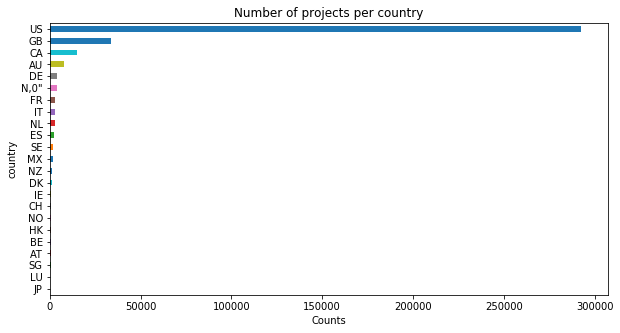

In [306]:
plt.figure(figsize=(10,5))
plt.title('Number of projects per country')
plt.xlabel('Counts')
df.groupby(by='country').count()['ID'].sort_values().plot(kind='barh');



In [307]:
#change any Non US project to other
df.loc[df.country != 'US', 'country'] = 'Others'


In [308]:
df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,Others,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


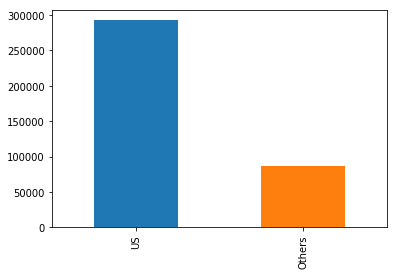

In [309]:
df.country.value_counts().plot('bar');

In [310]:
import numpy as np 

In [311]:
df['usd_goal_real'].describe()

count    3.786610e+05
mean     4.545440e+04
std      1.152950e+06
min      1.000000e-02
25%      2.000000e+03
50%      5.500000e+03
75%      1.550000e+04
max      1.663614e+08
Name: usd_goal_real, dtype: float64

In [312]:
df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,Others,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [313]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
ID                  378661 non-null int64
name                378657 non-null object
category            378661 non-null object
main_category       378661 non-null object
currency            378661 non-null object
deadline            378661 non-null object
goal                378661 non-null float64
launched            378661 non-null object
pledged             378661 non-null float64
state               378661 non-null object
backers             378661 non-null int64
country             378661 non-null object
usd pledged         374864 non-null float64
usd_pledged_real    378661 non-null float64
usd_goal_real       378661 non-null float64
dtypes: float64(5), int64(2), object(8)
memory usage: 43.3+ MB


In [314]:
df.drop_duplicates(inplace=True)

In [315]:
df.dropna(inplace=True)

In [316]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 374860 entries, 0 to 378660
Data columns (total 15 columns):
ID                  374860 non-null int64
name                374860 non-null object
category            374860 non-null object
main_category       374860 non-null object
currency            374860 non-null object
deadline            374860 non-null object
goal                374860 non-null float64
launched            374860 non-null object
pledged             374860 non-null float64
state               374860 non-null object
backers             374860 non-null int64
country             374860 non-null object
usd pledged         374860 non-null float64
usd_pledged_real    374860 non-null float64
usd_goal_real       374860 non-null float64
dtypes: float64(5), int64(2), object(8)
memory usage: 45.8+ MB


In [317]:
df['launched']=pd.to_datetime(df.launched)

In [318]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 374860 entries, 0 to 378660
Data columns (total 15 columns):
ID                  374860 non-null int64
name                374860 non-null object
category            374860 non-null object
main_category       374860 non-null object
currency            374860 non-null object
deadline            374860 non-null object
goal                374860 non-null float64
launched            374860 non-null datetime64[ns]
pledged             374860 non-null float64
state               374860 non-null object
backers             374860 non-null int64
country             374860 non-null object
usd pledged         374860 non-null float64
usd_pledged_real    374860 non-null float64
usd_goal_real       374860 non-null float64
dtypes: datetime64[ns](1), float64(5), int64(2), object(7)
memory usage: 45.8+ MB


In [319]:
df.launched.iloc[1].date()

datetime.date(2017, 9, 2)

In [320]:
from datetime import date, datetime


In [321]:
## to get season of the year
bins = [0, 91, 183, 275, 366]
labels=['Winter', 'Spring', 'Summer', 'Fall']
doy = df.launched.dt.dayofyear
df['season'] = pd.cut(doy + 11 - 366*(doy > 355), bins=bins, labels=labels)


In [322]:
#df['season'] = df.launched.apply(lambda x : get_season(x,x.year))

In [323]:
df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,season
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,Others,0.0,0.0,1533.95,Summer
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00,Summer
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00,Winter
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00,Winter
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00,Summer


In [324]:
#df

In [325]:
df.main_category.unique()

array(['Publishing', 'Film & Video', 'Music', 'Food', 'Design', 'Crafts',
       'Games', 'Comics', 'Fashion', 'Theater', 'Art', 'Photography',
       'Technology', 'Dance', 'Journalism'], dtype=object)

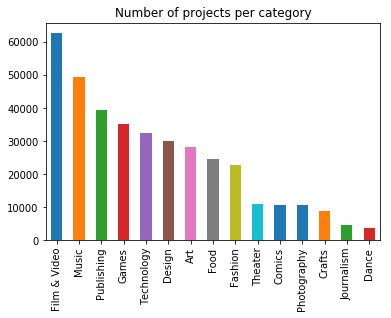

In [326]:
plt.title('Number of projects per category')
df.main_category.value_counts().plot(kind='bar');

### we can see the most projects in film & video

In [327]:
## since KS conversion doesn't seem very accurate we will drop the usd pledged

In [328]:
df.drop(columns=['usd pledged'],inplace=True)

In [329]:
df.head(30)

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd_pledged_real,usd_goal_real,season
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.00,failed,0,Others,0.00,1533.95,Summer
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.00,failed,15,US,2421.00,30000.00,Summer
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.00,failed,3,US,220.00,45000.00,Winter
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.00,failed,1,US,1.00,5000.00,Winter
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.00,canceled,14,US,1283.00,19500.00,Summer
5,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,50000.0,2016-02-26 13:38:27,52375.00,successful,224,US,52375.00,50000.00,Winter
6,1000023410,Support Solar Roasted Coffee & Green Energy! ...,Food,Food,USD,2014-12-21,1000.0,2014-12-01 18:30:44,1205.00,successful,16,US,1205.00,1000.00,Fall
7,1000030581,Chaser Strips. Our Strips make Shots their B*tch!,Drinks,Food,USD,2016-03-17,25000.0,2016-02-01 20:05:12,453.00,failed,40,US,453.00,25000.00,Winter
8,1000034518,SPIN - Premium Retractable In-Ear Headphones w...,Product Design,Design,USD,2014-05-29,125000.0,2014-04-24 18:14:43,8233.00,canceled,58,US,8233.00,125000.00,Spring
9,100004195,STUDIO IN THE SKY - A Documentary Feature Film...,Documentary,Film & Video,USD,2014-08-10,65000.0,2014-07-11 21:55:48,6240.57,canceled,43,US,6240.57,65000.00,Summer


In [330]:
df['deadline']= pd.to_datetime(df['deadline'])

In [331]:
#df['deadline'].dt.day - df['launched'].dt.day

In [332]:
#df['launched'].dt.

In [333]:
#from bs4 import BeautifulSoup


In [334]:
df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd_pledged_real,usd_goal_real,season
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,Others,0.0,1533.95,Summer
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,2421.0,30000.00,Summer
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,45000.00,Winter
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,5000.00,Winter
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,19500.00,Summer


In [335]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 374860 entries, 0 to 378660
Data columns (total 15 columns):
ID                  374860 non-null int64
name                374860 non-null object
category            374860 non-null object
main_category       374860 non-null object
currency            374860 non-null object
deadline            374860 non-null datetime64[ns]
goal                374860 non-null float64
launched            374860 non-null datetime64[ns]
pledged             374860 non-null float64
state               374860 non-null object
backers             374860 non-null int64
country             374860 non-null object
usd_pledged_real    374860 non-null float64
usd_goal_real       374860 non-null float64
season              374860 non-null category
dtypes: category(1), datetime64[ns](2), float64(4), int64(2), object(6)
memory usage: 43.3+ MB


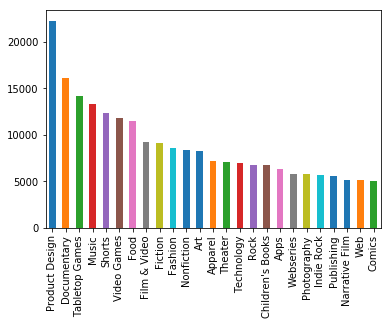

In [336]:
df.category.value_counts()[:25].plot(kind='bar');

## plot only the first 25 sub category 

### let us invistgate more on product design projects

In [337]:
df.query("category == 'Product Design'").state.value_counts()

failed        10718
successful     7961
canceled       3207
live            237
suspended       187
Name: state, dtype: int64

In [338]:
df.query("category == 'Product Design' & state =='successful'").count()[1]/df.query("category == 'Product Design'").count()[1]

0.35683549977588525

## here is the percentage that if project is product design has 35.6% of being successful

In [339]:
df.query("main_category == 'Film & Video'").state.value_counts()

failed        32891
successful    23612
canceled       5744
live            332
suspended       117
Name: state, dtype: int64

In [340]:
df.query("main_category == 'Film & Video' & state =='successful'").count()[1]/df.query("main_category == 'Film & Video'").count()[1]


0.3766109480668623

## here is the percentage that if project is Film & Video has 37.6% of being successful


In [341]:
df.launched.dt.year.value_counts()

2015    74919
2014    66993
2016    56536
2017    52200
2013    44836
2012    41161
2011    26236
2010    10519
2009     1329
2018      124
1970        7
Name: launched, dtype: int64

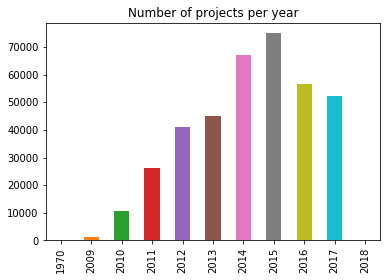

In [342]:
plt.title('Number of projects per year')
df.launched.dt.year.value_counts().sort_index().plot(kind='bar');


## here we can see that kickstarter have risen with popularity through the years until 2016 we see a decline 

## let see if 2015 have higher successful 

In [343]:
#df.drop(index=df.query("state =='live' or state = 'canceled' or  state == 'suspended' ").index,inplace=True)

### drop any value that are not success or failure

In [344]:
#df.query("state =='live' | state = 'canceled' |  state == 'suspended' ").index

df.drop(index=df[df.state.isin(['live', 'canceled', 'suspended'])].index,inplace=True)

In [345]:
df.query("state =='live'").index

Int64Index([], dtype='int64')

In [346]:
df.state.unique()

array(['failed', 'successful'], dtype=object)

In [347]:
#df['state'] = df.state.map({'failed':'failed','canceled':'failed','suspended':'failed','successful':'successful'})

In [348]:
df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd_pledged_real,usd_goal_real,season
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,Others,0.0,1533.95,Summer
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,2421.0,30000.00,Summer
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,45000.00,Winter
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,5000.00,Winter
5,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,50000.0,2016-02-26 13:38:27,52375.0,successful,224,US,52375.0,50000.00,Winter


In [349]:
df.state.nunique()

2

In [350]:
df.drop(df.loc[df.launched.dt.year == 1970].index,inplace=True)
df.drop(df.loc[df.launched.dt.year == 2018].index,inplace=True)

### Remove any data that have wrong launch date or 2018 because they are very less and they only contain the first month

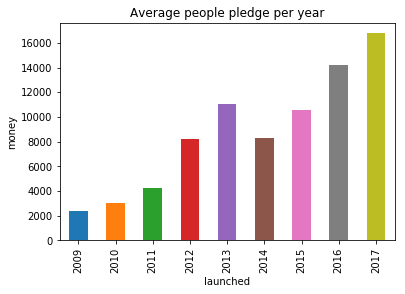

In [351]:
plt.title('Average people pledge per year')
plt.ylabel('money')
df.groupby(df.launched.dt.year).mean()['pledged'].plot('bar');

## Here we can see that people more people pledge money why is that?
## let us invistigate more on this

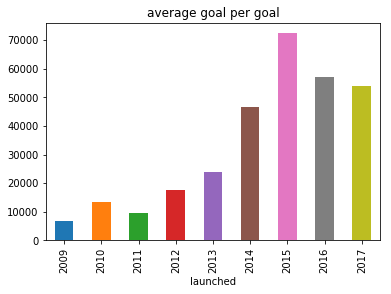

In [352]:
plt.title('average goal per goal')
df.groupby(df.launched.dt.year).mean()['goal'].plot('bar');

## we can see that in year 2015 have the highest goal for projects

## 2015 is interesting year for kickstarter  we need to invistigate more in this year to fully understand 
### what i expect in this year that kickstarter have risen in popularity in this year as platform and many creator believed in it as solid platform 

In [353]:
temp = {'successful': 1, 'failed': 0}
df['state'] = df['state'].map(temp)

In [354]:
df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd_pledged_real,usd_goal_real,season
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,0,0,Others,0.0,1533.95,Summer
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,0,15,US,2421.0,30000.00,Summer
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,0,3,US,220.0,45000.00,Winter
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,0,1,US,1.0,5000.00,Winter
5,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,50000.0,2016-02-26 13:38:27,52375.0,1,224,US,52375.0,50000.00,Winter


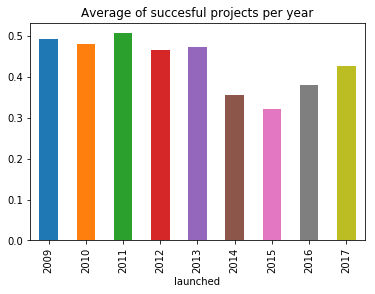

In [355]:
plt.title('Average of succesful projects per year')
df.groupby(df.launched.dt.year).mean()['state'].plot('bar');

In [356]:
df.groupby('state').mean()

,ID,goal,pledged,backers,usd_pledged_real,usd_goal_real
state,,,,,,
0,1.074643e+09,67363.127949,1427.445891,16.431236,1321.102821,63189.222623
1,1.073765e+09,10166.109761,24094.387965,264.128397,22664.485818,9535.701785


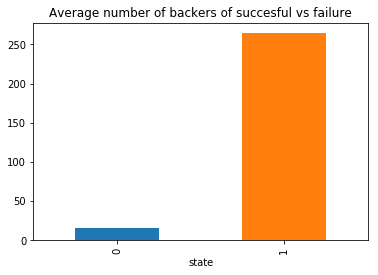

In [357]:
plt.title('Average number of backers of succesful vs failure')
plt.xticks()
df.groupby('state').mean()['backers'].plot('bar');


## more backers the more projects tend to succeed 

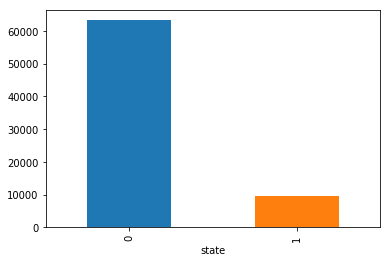

In [358]:
df.groupby('state').mean()['usd_goal_real'].plot('bar');

## as expected when there is a high goal the project tend to fail 

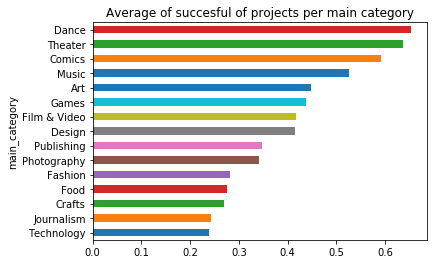

In [359]:
plt.title('Average of succesful of projects per main category')
df.groupby('main_category').mean()['state'].sort_values().plot('barh');

## Here we can see the most succesful genre is Dance followed by Theater

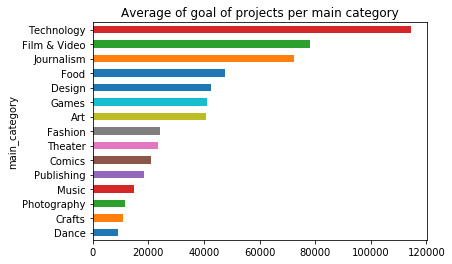

In [360]:
plt.title('Average of goal of projects per main category')
df.groupby('main_category').mean()['goal'].sort_values().plot('barh');

## as we say again a clear sign that if a goal is huge the project tend to fail

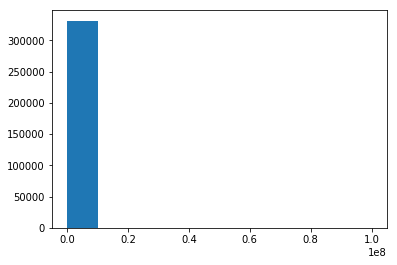

In [361]:
plt.hist(data=df,x='goal');

In [362]:
df['goal'].describe()

count    3.314620e+05
mean     4.426583e+04
std      1.118269e+06
min      1.000000e-02
25%      2.000000e+03
50%      5.000000e+03
75%      1.500000e+04
max      1.000000e+08
Name: goal, dtype: float64

In [363]:
df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd_pledged_real,usd_goal_real,season
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,0,0,Others,0.0,1533.95,Summer
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,0,15,US,2421.0,30000.00,Summer
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,0,3,US,220.0,45000.00,Winter
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,0,1,US,1.0,5000.00,Winter
5,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,50000.0,2016-02-26 13:38:27,52375.0,1,224,US,52375.0,50000.00,Winter


In [364]:
sorted_goal = sorted(df['usd_goal_real'])


In [365]:
q1, q3= np.percentile(sorted_goal,[25,75])


In [366]:
iqr = q3 - q1

In [367]:
iqr

13000.0

In [368]:
lower_bound = q1 -(1.5 * iqr) 
upper_bound = q3 +(1.5 * iqr) 

In [369]:
lower_bound

-17500.0

In [370]:
upper_bound

34500.0

## here anything above 38250.0 is suspected outliers and some people just put random number i have seen some one asking for 100M for a comic book we will not delete these numbers currently but for sake seeing skeweens we will only see the less than the upper bound

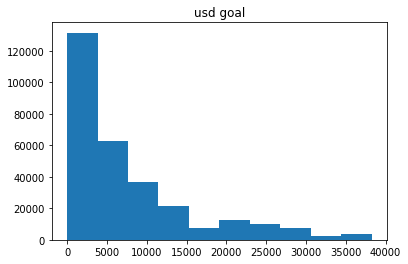

In [371]:
plt.title('usd goal')
plt.hist(df.loc[df['usd_goal_real']<38250.0]['usd_goal_real']);

## there is a skewness in the goal

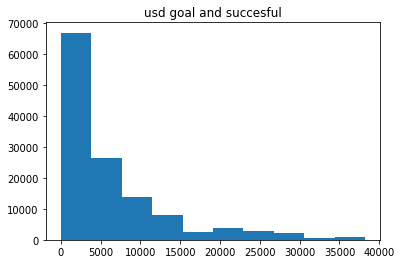

In [372]:
plt.title('usd goal and succesful')
plt.hist(df.loc[(df['usd_goal_real']<38250.0) & (df['state']==1)]['usd_goal_real']);

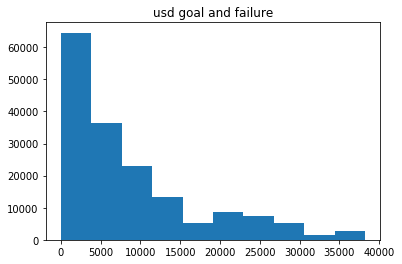

In [373]:
plt.title('usd goal and failure')
plt.hist(df.loc[(df['usd_goal_real']<38250.0) & (df['state']==0)]['usd_goal_real']);

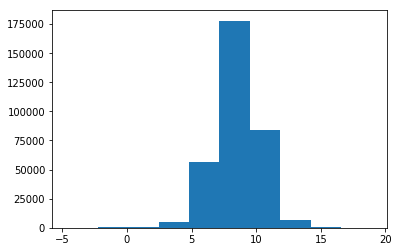

In [374]:
## normalize the data
df['norm_log'] = np.log(df['usd_goal_real']);
plt.hist(df['norm_log']);

In [375]:
df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd_pledged_real,usd_goal_real,season,norm_log
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,0,0,Others,0.0,1533.95,Summer,7.335601
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,0,15,US,2421.0,30000.00,Summer,10.308953
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,0,3,US,220.0,45000.00,Winter,10.714418
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,0,1,US,1.0,5000.00,Winter,8.517193
5,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,50000.0,2016-02-26 13:38:27,52375.0,1,224,US,52375.0,50000.00,Winter,10.819778


In [376]:
#plt.scatter(data=df,x='backers',y='usd_pledged_real')

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


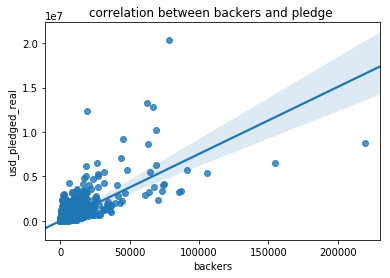

In [377]:
plt.title('correlation between backers and pledge ')
sns.regplot(data=df,x='backers',y='usd_pledged_real');

## there is a correlation between backers and pledge 

In [378]:
df['time_launched']= df['deadline'].dt.date - df['launched'].dt.date

In [379]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 331462 entries, 0 to 378660
Data columns (total 17 columns):
ID                  331462 non-null int64
name                331462 non-null object
category            331462 non-null object
main_category       331462 non-null object
currency            331462 non-null object
deadline            331462 non-null datetime64[ns]
goal                331462 non-null float64
launched            331462 non-null datetime64[ns]
pledged             331462 non-null float64
state               331462 non-null int64
backers             331462 non-null int64
country             331462 non-null object
usd_pledged_real    331462 non-null float64
usd_goal_real       331462 non-null float64
season              331462 non-null category
norm_log            331462 non-null float64
time_launched       331462 non-null timedelta64[ns]
dtypes: category(1), datetime64[ns](2), float64(5), int64(3), object(5), timedelta64[ns](1)
memory usage: 43.3+ MB


In [380]:
df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd_pledged_real,usd_goal_real,season,norm_log,time_launched
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,0,0,Others,0.0,1533.95,Summer,7.335601,59 days
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,0,15,US,2421.0,30000.00,Summer,10.308953,60 days
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,0,3,US,220.0,45000.00,Winter,10.714418,45 days
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,0,1,US,1.0,5000.00,Winter,8.517193,30 days
5,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,50000.0,2016-02-26 13:38:27,52375.0,1,224,US,52375.0,50000.00,Winter,10.819778,35 days


In [381]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 331462 entries, 0 to 378660
Data columns (total 17 columns):
ID                  331462 non-null int64
name                331462 non-null object
category            331462 non-null object
main_category       331462 non-null object
currency            331462 non-null object
deadline            331462 non-null datetime64[ns]
goal                331462 non-null float64
launched            331462 non-null datetime64[ns]
pledged             331462 non-null float64
state               331462 non-null int64
backers             331462 non-null int64
country             331462 non-null object
usd_pledged_real    331462 non-null float64
usd_goal_real       331462 non-null float64
season              331462 non-null category
norm_log            331462 non-null float64
time_launched       331462 non-null timedelta64[ns]
dtypes: category(1), datetime64[ns](2), float64(5), int64(3), object(5), timedelta64[ns](1)
memory usage: 43.3+ MB


In [382]:
df['time_launched']=df['time_launched'].astype('timedelta64[D]')

In [383]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 331462 entries, 0 to 378660
Data columns (total 17 columns):
ID                  331462 non-null int64
name                331462 non-null object
category            331462 non-null object
main_category       331462 non-null object
currency            331462 non-null object
deadline            331462 non-null datetime64[ns]
goal                331462 non-null float64
launched            331462 non-null datetime64[ns]
pledged             331462 non-null float64
state               331462 non-null int64
backers             331462 non-null int64
country             331462 non-null object
usd_pledged_real    331462 non-null float64
usd_goal_real       331462 non-null float64
season              331462 non-null category
norm_log            331462 non-null float64
time_launched       331462 non-null float64
dtypes: category(1), datetime64[ns](2), float64(6), int64(3), object(5)
memory usage: 43.3+ MB


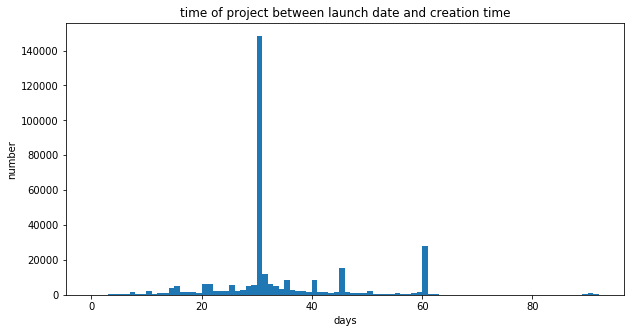

In [384]:
bins_edges = np.arange(0,df['time_launched'].max()+1,1)
plt.figure(figsize=(10,5))
plt.title('time of project between launch date and creation time')

plt.xlabel('days')
plt.ylabel('number')
plt.hist(data=df,x='time_launched',bins=bins_edges);


## most projects takes 30 days to launch

In [385]:
df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd_pledged_real,usd_goal_real,season,norm_log,time_launched
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,0,0,Others,0.0,1533.95,Summer,7.335601,59.0
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,0,15,US,2421.0,30000.00,Summer,10.308953,60.0
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,0,3,US,220.0,45000.00,Winter,10.714418,45.0
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,0,1,US,1.0,5000.00,Winter,8.517193,30.0
5,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,50000.0,2016-02-26 13:38:27,52375.0,1,224,US,52375.0,50000.00,Winter,10.819778,35.0


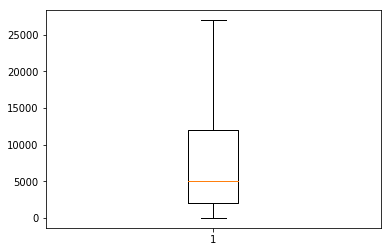

In [386]:
plt.boxplot(df.loc[(df['usd_goal_real']<38250.0) & (df['state']==0)]['usd_goal_real'],showfliers=False);

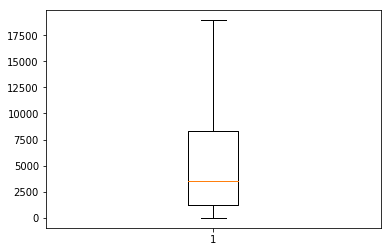

In [387]:
plt.boxplot(df.loc[(df['usd_goal_real']<38250.0) & (df['state']==1)]['usd_goal_real'],showfliers=False);

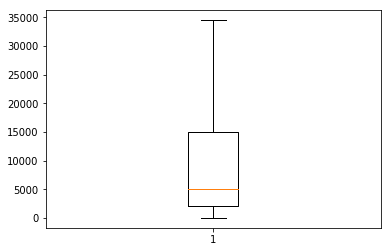

In [388]:
plt.boxplot(df['usd_goal_real'],showfliers=False);

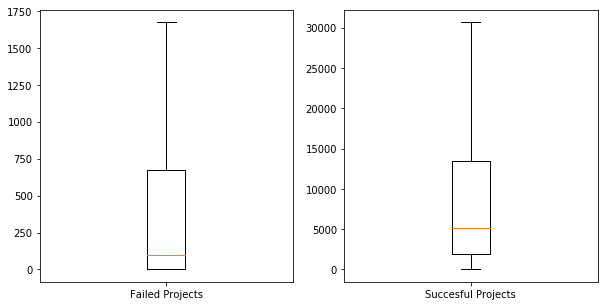

In [389]:

fig,ax = plt.subplots(1,2,figsize=(10,5))
ax[0].boxplot(df.loc[df['state']==0]['pledged'],showfliers=False)
ax[0].set_xticklabels(['Failed Projects'])
ax[1].boxplot(df.loc[df['state']==1]['pledged'],showfliers=False)
ax[1].set_xticklabels(['Succesful Projects']);




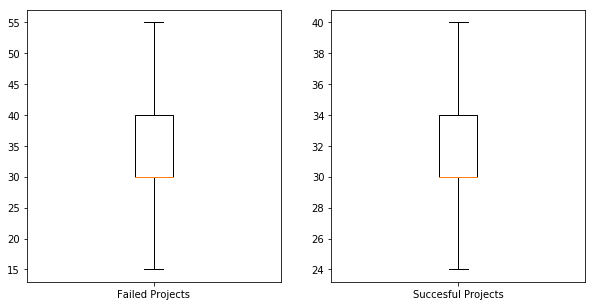

In [390]:
fig,ax = plt.subplots(1,2,figsize=(10,5))
ax[0].boxplot(df.loc[df['state']==0]['time_launched'],showfliers=False)
ax[0].set_xticklabels(['Failed Projects'])
ax[1].boxplot(df.loc[df['state']==1]['time_launched'],showfliers=False)
ax[1].set_xticklabels(['Succesful Projects']);


## failed prjects takes more time to finish

In [391]:
df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd_pledged_real,usd_goal_real,season,norm_log,time_launched
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,0,0,Others,0.0,1533.95,Summer,7.335601,59.0
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,0,15,US,2421.0,30000.00,Summer,10.308953,60.0
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,0,3,US,220.0,45000.00,Winter,10.714418,45.0
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,0,1,US,1.0,5000.00,Winter,8.517193,30.0
5,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,50000.0,2016-02-26 13:38:27,52375.0,1,224,US,52375.0,50000.00,Winter,10.819778,35.0


In [392]:
new_df = pd.concat([df,pd.get_dummies(df['main_category'])],axis=1)


In [393]:
new_df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,...,Fashion,Film & Video,Food,Games,Journalism,Music,Photography,Publishing,Technology,Theater
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,0,...,0,0,0,0,0,0,0,1,0,0
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,0,...,0,1,0,0,0,0,0,0,0,0
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,0,...,0,1,0,0,0,0,0,0,0,0
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,0,...,0,0,0,0,0,1,0,0,0,0
5,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,50000.0,2016-02-26 13:38:27,52375.0,1,...,0,0,1,0,0,0,0,0,0,0


In [394]:
new_df =pd.concat([new_df,pd.get_dummies(df['country'])],axis=1)

In [395]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 331462 entries, 0 to 378660
Data columns (total 34 columns):
ID                  331462 non-null int64
name                331462 non-null object
category            331462 non-null object
main_category       331462 non-null object
currency            331462 non-null object
deadline            331462 non-null datetime64[ns]
goal                331462 non-null float64
launched            331462 non-null datetime64[ns]
pledged             331462 non-null float64
state               331462 non-null int64
backers             331462 non-null int64
country             331462 non-null object
usd_pledged_real    331462 non-null float64
usd_goal_real       331462 non-null float64
season              331462 non-null category
norm_log            331462 non-null float64
time_launched       331462 non-null float64
Art                 331462 non-null uint8
Comics              331462 non-null uint8
Crafts              331462 non-null uint8
Dance      

In [396]:
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split


In [397]:
new_df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,...,Food,Games,Journalism,Music,Photography,Publishing,Technology,Theater,Others,US
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,0,...,0,0,0,0,0,1,0,0,1,0
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,0,...,0,0,0,0,0,0,0,0,0,1
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,0,...,0,0,0,0,0,0,0,0,0,1
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,0,...,0,0,0,1,0,0,0,0,0,1
5,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,50000.0,2016-02-26 13:38:27,52375.0,1,...,1,0,0,0,0,0,0,0,0,1


In [398]:
features = ['norm_log','Art','Comics','Crafts','Dance','Design','Fashion','Film & Video'
            ,'Food','Games','Journalism','Music','Photography','Publishing','Technology','Theater','num_of_word','week_sin','week_cos'
            ,'is_weekend']

predict = ['state']



In [399]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 331462 entries, 0 to 378660
Data columns (total 34 columns):
ID                  331462 non-null int64
name                331462 non-null object
category            331462 non-null object
main_category       331462 non-null object
currency            331462 non-null object
deadline            331462 non-null datetime64[ns]
goal                331462 non-null float64
launched            331462 non-null datetime64[ns]
pledged             331462 non-null float64
state               331462 non-null int64
backers             331462 non-null int64
country             331462 non-null object
usd_pledged_real    331462 non-null float64
usd_goal_real       331462 non-null float64
season              331462 non-null category
norm_log            331462 non-null float64
time_launched       331462 non-null float64
Art                 331462 non-null uint8
Comics              331462 non-null uint8
Crafts              331462 non-null uint8
Dance      

In [400]:
new_df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,...,Food,Games,Journalism,Music,Photography,Publishing,Technology,Theater,Others,US
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,0,...,0,0,0,0,0,1,0,0,1,0
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,0,...,0,0,0,0,0,0,0,0,0,1
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,0,...,0,0,0,0,0,0,0,0,0,1
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,0,...,0,0,0,1,0,0,0,0,0,1
5,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,50000.0,2016-02-26 13:38:27,52375.0,1,...,1,0,0,0,0,0,0,0,0,1


In [401]:
#tn, fp, fn, tp = confusion_matrix(y_test, Predictions).ravel()

In [402]:
#(tn, fp, fn, tp)

In [403]:
#logmod.score(X_test, y_test)

In [404]:
#predicted = cross_validation.cross_val_predict(LogisticRegression(),new_df[features],
 #                                              new_df[predict].values.ravel(),cv=10)


In [405]:
#score = cross_validation.cross_val_score(LogisticRegression(),new_df[features],
 #                                              new_df[predict].values.ravel(),cv=10)


In [406]:
#predicted.mean()

In [407]:
#print("Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))

## there is no overfitting i have had to double checked on  train_test_split because there is a chance of overfitting in this way but with cross_validation i think the model is correct 

## my first model is not great we need a second one with more feature 

In [408]:
df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd_pledged_real,usd_goal_real,season,norm_log,time_launched
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,0,0,Others,0.0,1533.95,Summer,7.335601,59.0
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,0,15,US,2421.0,30000.00,Summer,10.308953,60.0
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,0,3,US,220.0,45000.00,Winter,10.714418,45.0
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,0,1,US,1.0,5000.00,Winter,8.517193,30.0
5,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,50000.0,2016-02-26 13:38:27,52375.0,1,224,US,52375.0,50000.00,Winter,10.819778,35.0


In [409]:
new_df= pd.concat([new_df,pd.get_dummies(df['season'])],axis=1)

In [410]:
df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd_pledged_real,usd_goal_real,season,norm_log,time_launched
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,0,0,Others,0.0,1533.95,Summer,7.335601,59.0
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,0,15,US,2421.0,30000.00,Summer,10.308953,60.0
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,0,3,US,220.0,45000.00,Winter,10.714418,45.0
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,0,1,US,1.0,5000.00,Winter,8.517193,30.0
5,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,50000.0,2016-02-26 13:38:27,52375.0,1,224,US,52375.0,50000.00,Winter,10.819778,35.0


In [411]:
df['Creation_month'] = df.launched.dt.month

In [412]:
df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd_pledged_real,usd_goal_real,season,norm_log,time_launched,Creation_month
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,0,0,Others,0.0,1533.95,Summer,7.335601,59.0,8
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,0,15,US,2421.0,30000.00,Summer,10.308953,60.0,9
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,0,3,US,220.0,45000.00,Winter,10.714418,45.0,1
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,0,1,US,1.0,5000.00,Winter,8.517193,30.0,3
5,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,50000.0,2016-02-26 13:38:27,52375.0,1,224,US,52375.0,50000.00,Winter,10.819778,35.0,2


In [413]:
#df['Creation_month'] = df['Creation_month'].map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',
 #                          7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})

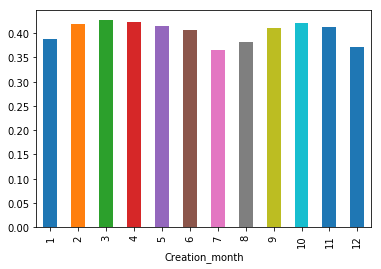

In [414]:
df.groupby(by=['Creation_month']).mean()['state'].plot('bar')

## July and december are the worst months to create a project 

In [415]:
#new_df = pd.concat([new_df,pd.get_dummies(df['Creation_month'])],axis=1)

In [416]:
new_df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,...,Photography,Publishing,Technology,Theater,Others,US,Winter,Spring,Summer,Fall
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,0,...,0,1,0,0,1,0,0,0,1,0
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,0,...,0,0,0,0,0,1,0,0,1,0
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,0,...,0,0,0,0,0,1,1,0,0,0
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,0,...,0,0,0,0,0,1,1,0,0,0
5,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,50000.0,2016-02-26 13:38:27,52375.0,1,...,0,0,0,0,0,1,1,0,0,0


In [417]:
import nltk

### here i will try if number of words in title matter is less words make diffrence  or not

In [418]:
from nltk.corpus import stopwords

In [419]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ziyadalkhonein/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [420]:
stop_words = stopwords.words('english')

In [421]:
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [422]:
import re

In [423]:
nonPunct = re.compile('.*[A-Za-z0-9].*')

In [424]:
df['words_name'] = [words for words in df['name'].str.split()]

In [425]:
df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd_pledged_real,usd_goal_real,season,norm_log,time_launched,Creation_month,words_name
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,0,0,Others,0.0,1533.95,Summer,7.335601,59.0,8,"[The, Songs, of, Adelaide, &, Abullah]"
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,0,15,US,2421.0,30000.00,Summer,10.308953,60.0,9,"[Greeting, From, Earth:, ZGAC, Arts, Capsule, ..."
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,0,3,US,220.0,45000.00,Winter,10.714418,45.0,1,"[Where, is, Hank?]"
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,0,1,US,1.0,5000.00,Winter,8.517193,30.0,3,"[ToshiCapital, Rekordz, Needs, Help, to, Compl..."
5,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,50000.0,2016-02-26 13:38:27,52375.0,1,224,US,52375.0,50000.00,Winter,10.819778,35.0,2,"[Monarch, Espresso, Bar]"


In [426]:
df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd_pledged_real,usd_goal_real,season,norm_log,time_launched,Creation_month,words_name
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,0,0,Others,0.0,1533.95,Summer,7.335601,59.0,8,"[The, Songs, of, Adelaide, &, Abullah]"
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,0,15,US,2421.0,30000.00,Summer,10.308953,60.0,9,"[Greeting, From, Earth:, ZGAC, Arts, Capsule, ..."
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,0,3,US,220.0,45000.00,Winter,10.714418,45.0,1,"[Where, is, Hank?]"
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,0,1,US,1.0,5000.00,Winter,8.517193,30.0,3,"[ToshiCapital, Rekordz, Needs, Help, to, Compl..."
5,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,50000.0,2016-02-26 13:38:27,52375.0,1,224,US,52375.0,50000.00,Winter,10.819778,35.0,2,"[Monarch, Espresso, Bar]"


In [427]:
df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd_pledged_real,usd_goal_real,season,norm_log,time_launched,Creation_month,words_name
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,0,0,Others,0.0,1533.95,Summer,7.335601,59.0,8,"[The, Songs, of, Adelaide, &, Abullah]"
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,0,15,US,2421.0,30000.00,Summer,10.308953,60.0,9,"[Greeting, From, Earth:, ZGAC, Arts, Capsule, ..."
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,0,3,US,220.0,45000.00,Winter,10.714418,45.0,1,"[Where, is, Hank?]"
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,0,1,US,1.0,5000.00,Winter,8.517193,30.0,3,"[ToshiCapital, Rekordz, Needs, Help, to, Compl..."
5,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,50000.0,2016-02-26 13:38:27,52375.0,1,224,US,52375.0,50000.00,Winter,10.819778,35.0,2,"[Monarch, Espresso, Bar]"


In [428]:
punc = [',','.','!','?','@','&','(',')','[',']','^']

In [429]:
for words in df['words_name']:
    for word in words:
        if word in stop_words or word in punc:
            words.remove(word)
        

In [430]:
df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd_pledged_real,usd_goal_real,season,norm_log,time_launched,Creation_month,words_name
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,0,0,Others,0.0,1533.95,Summer,7.335601,59.0,8,"[The, Songs, Adelaide, Abullah]"
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,0,15,US,2421.0,30000.00,Summer,10.308953,60.0,9,"[Greeting, From, Earth:, ZGAC, Arts, Capsule, ..."
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,0,3,US,220.0,45000.00,Winter,10.714418,45.0,1,"[Where, Hank?]"
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,0,1,US,1.0,5000.00,Winter,8.517193,30.0,3,"[ToshiCapital, Rekordz, Needs, Help, Complete,..."
5,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,50000.0,2016-02-26 13:38:27,52375.0,1,224,US,52375.0,50000.00,Winter,10.819778,35.0,2,"[Monarch, Espresso, Bar]"


In [431]:
new_df['num_of_word'] = df.words_name.apply (lambda x : len(x))

In [432]:
df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd_pledged_real,usd_goal_real,season,norm_log,time_launched,Creation_month,words_name
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,0,0,Others,0.0,1533.95,Summer,7.335601,59.0,8,"[The, Songs, Adelaide, Abullah]"
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,0,15,US,2421.0,30000.00,Summer,10.308953,60.0,9,"[Greeting, From, Earth:, ZGAC, Arts, Capsule, ..."
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,0,3,US,220.0,45000.00,Winter,10.714418,45.0,1,"[Where, Hank?]"
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,0,1,US,1.0,5000.00,Winter,8.517193,30.0,3,"[ToshiCapital, Rekordz, Needs, Help, Complete,..."
5,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,50000.0,2016-02-26 13:38:27,52375.0,1,224,US,52375.0,50000.00,Winter,10.819778,35.0,2,"[Monarch, Espresso, Bar]"


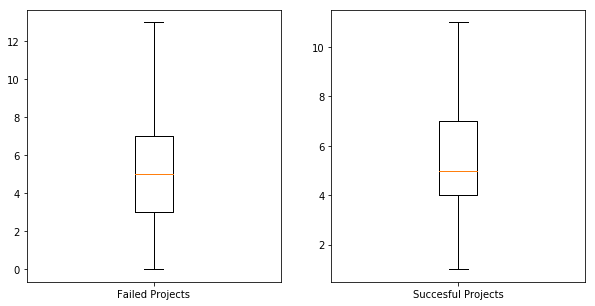

In [433]:
fig,ax = plt.subplots(1,2,figsize=(10,5))
ax[0].boxplot(new_df.loc[df['state']==0]['num_of_word'],showfliers=False)
ax[0].set_xticklabels(['Failed Projects'])
ax[1].boxplot(new_df.loc[df['state']==1]['num_of_word'],showfliers=False)
ax[1].set_xticklabels(['Succesful Projects']);


## there is no significant difference between the two 

In [434]:
#plt.scatter(data=df,x='num_of_word',y='backers')

In [435]:
#plt.scatter(data=df,x='num_of_word',y='pledged')

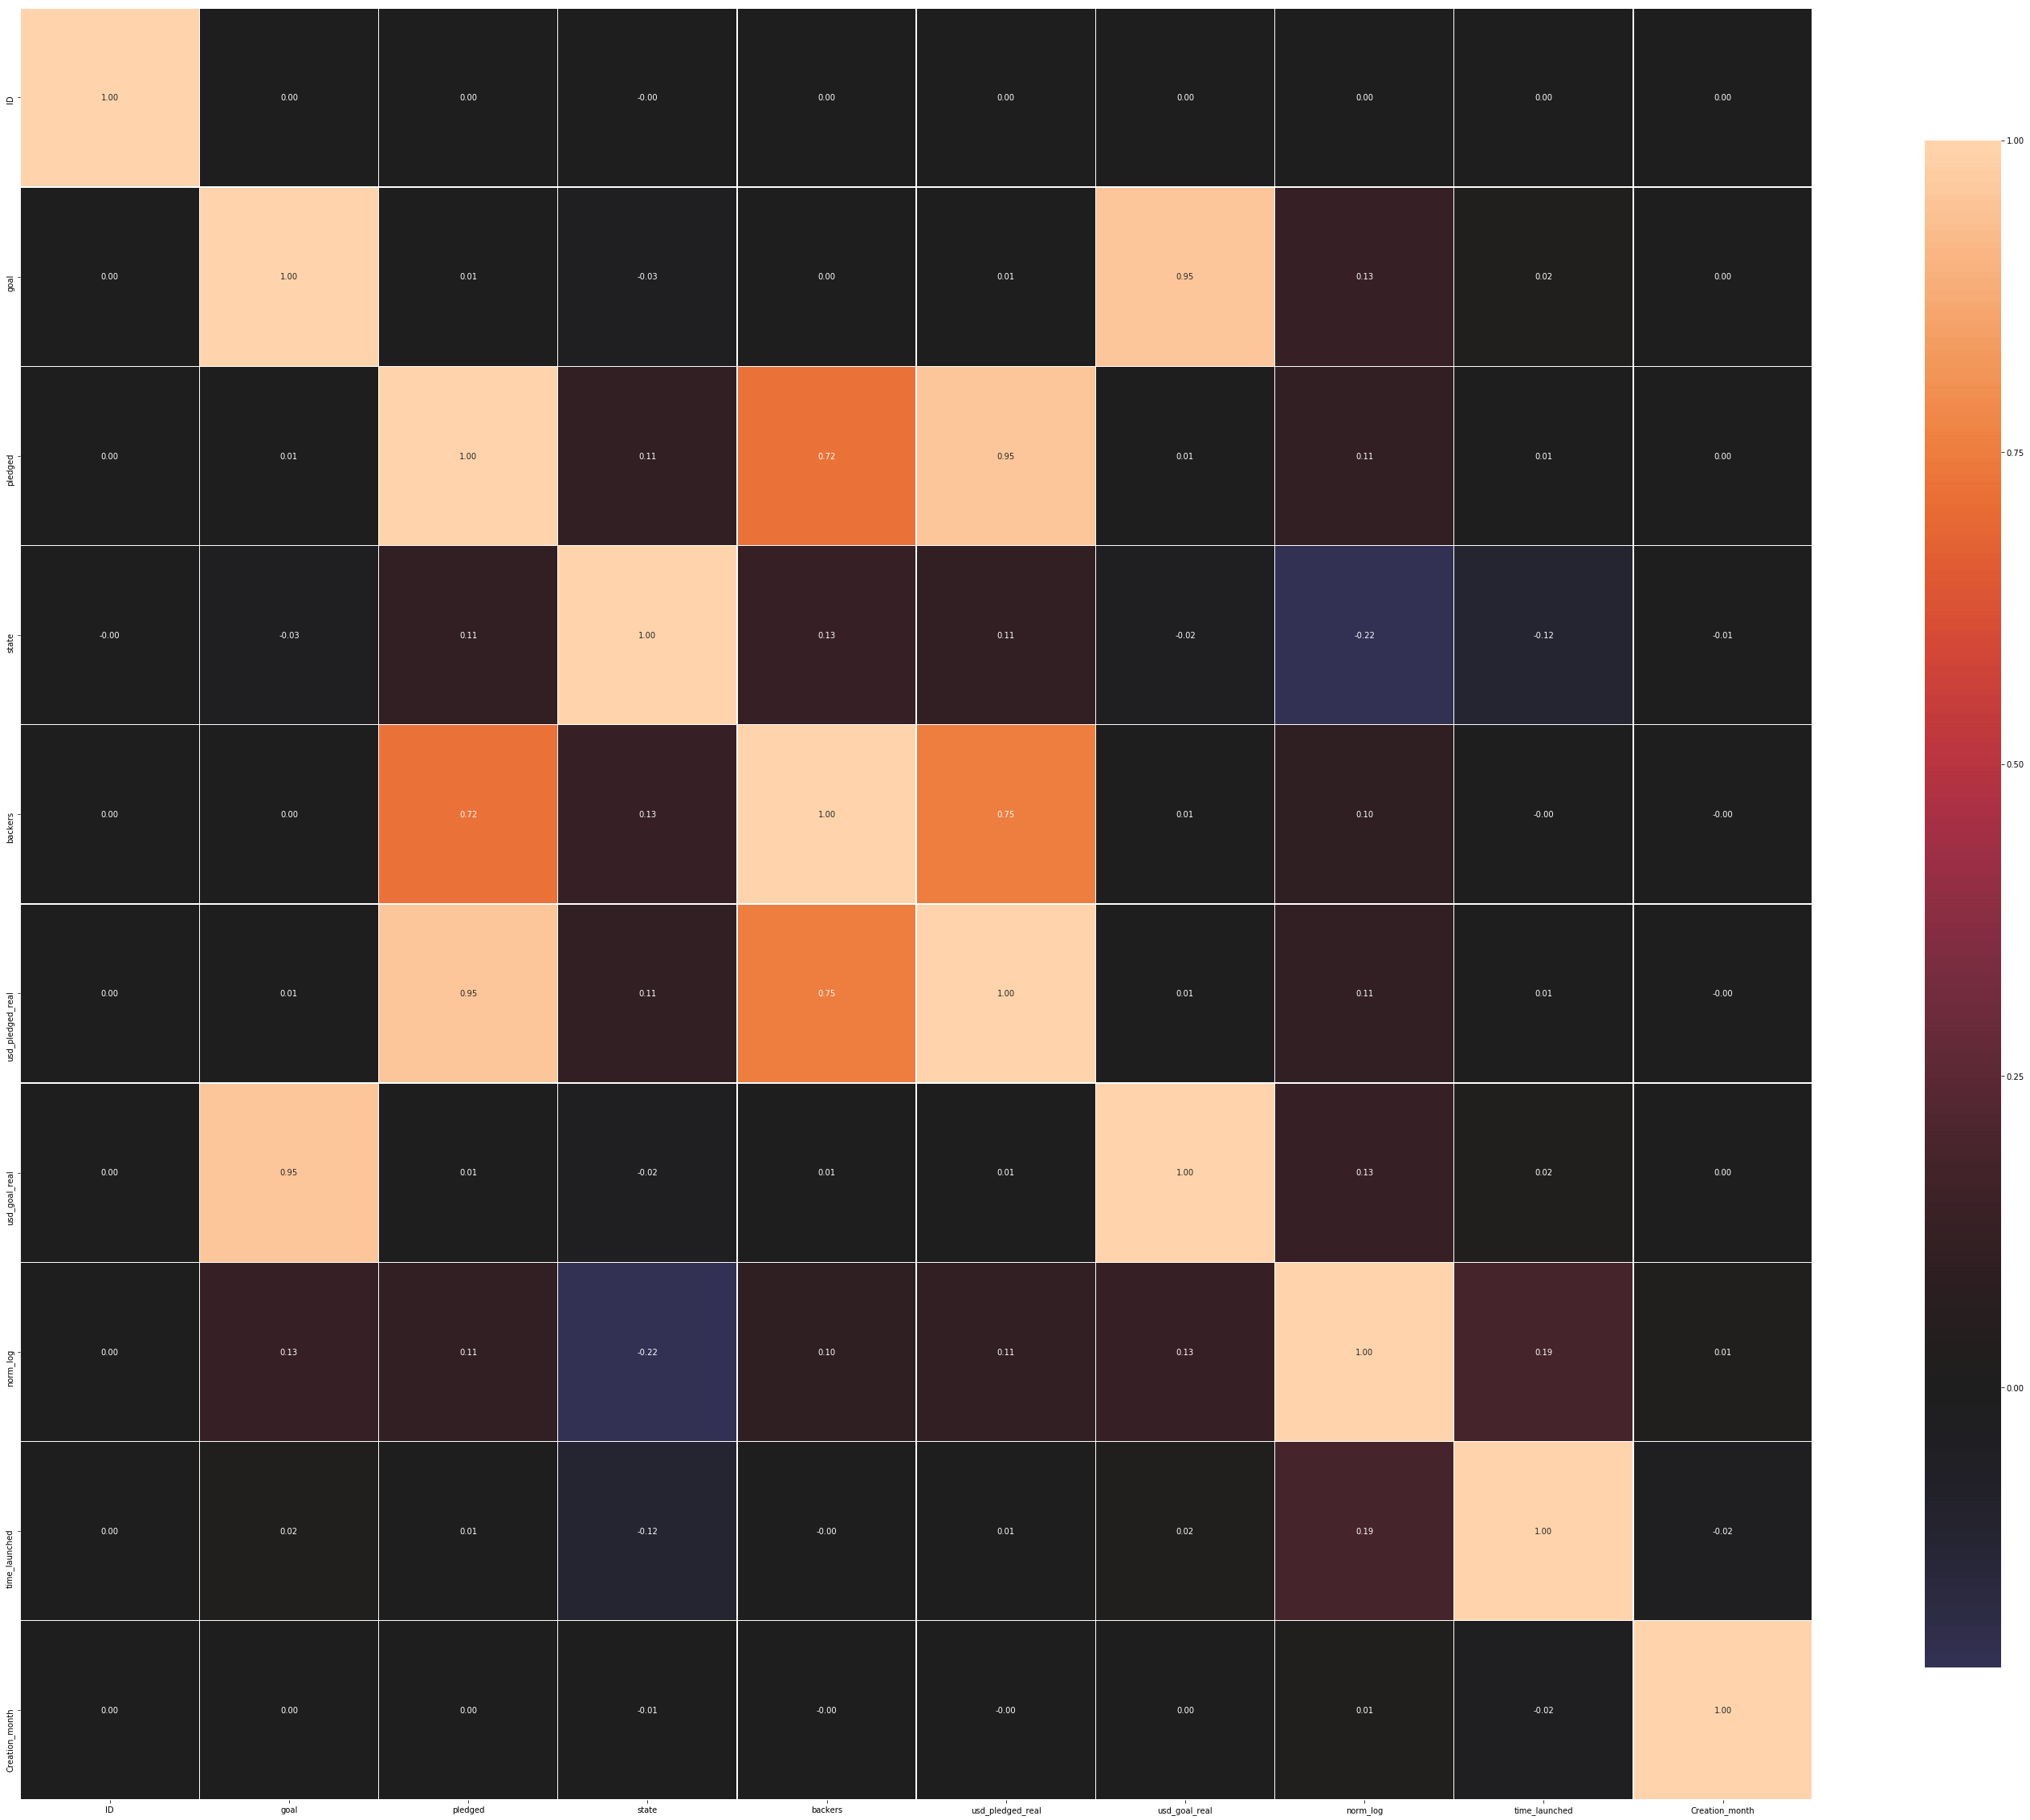

In [436]:
correlations = df.corr()

fig, ax = plt.subplots(figsize=(50,50))
sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f',
            square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70})
plt.show();


In [441]:
df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd_pledged_real,usd_goal_real,season,norm_log,time_launched,Creation_month,words_name
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,0,0,Others,0.0,1533.95,Summer,7.335601,59.0,8,"[The, Songs, Adelaide, Abullah]"
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,0,15,US,2421.0,30000.00,Summer,10.308953,60.0,9,"[Greeting, From, Earth:, ZGAC, Arts, Capsule, ..."
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,0,3,US,220.0,45000.00,Winter,10.714418,45.0,1,"[Where, Hank?]"
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,0,1,US,1.0,5000.00,Winter,8.517193,30.0,3,"[ToshiCapital, Rekordz, Needs, Help, Complete,..."
5,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,50000.0,2016-02-26 13:38:27,52375.0,1,224,US,52375.0,50000.00,Winter,10.819778,35.0,2,"[Monarch, Espresso, Bar]"


In [442]:
new_df['dayofweek'] = df.launched.dt.dayofweek

In [443]:
new_df.dayofweek.unique()

array([1, 5, 4, 0, 2, 3, 6])

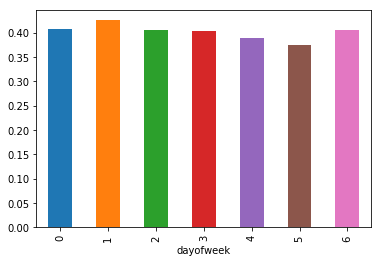

In [444]:
new_df.groupby('dayofweek').mean()['state'].plot('bar')

In [445]:
#np.sin((new_df.Creation_month-1)*(2.*np.pi/12))
#np.cos((new_df.Creation_month-1)*(2.*np.pi/12))


In [446]:
new_df['week_sin']= np.sin((new_df.dayofweek/7)*(2.*np.pi))

In [447]:
new_df['week_cos']=np.cos((new_df.dayofweek/7)*(2.*np.pi))


In [451]:
(new_df.head())

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,...,Others,US,Winter,Spring,Summer,Fall,num_of_word,dayofweek,week_sin,week_cos
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,0,...,1,0,0,0,1,0,4,1,0.781831,0.623490
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,0,...,0,1,0,0,1,0,8,5,-0.974928,-0.222521
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,0,...,0,1,1,0,0,0,2,5,-0.974928,-0.222521
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,0,...,0,1,1,0,0,0,6,5,-0.974928,-0.222521
5,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,50000.0,2016-02-26 13:38:27,52375.0,1,...,0,1,1,0,0,0,3,4,-0.433884,-0.900969


In [452]:
df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd_pledged_real,usd_goal_real,season,norm_log,time_launched,Creation_month,words_name
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,0,0,Others,0.0,1533.95,Summer,7.335601,59.0,8,"[The, Songs, Adelaide, Abullah]"
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,0,15,US,2421.0,30000.00,Summer,10.308953,60.0,9,"[Greeting, From, Earth:, ZGAC, Arts, Capsule, ..."
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,0,3,US,220.0,45000.00,Winter,10.714418,45.0,1,"[Where, Hank?]"
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,0,1,US,1.0,5000.00,Winter,8.517193,30.0,3,"[ToshiCapital, Rekordz, Needs, Help, Complete,..."
5,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,50000.0,2016-02-26 13:38:27,52375.0,1,224,US,52375.0,50000.00,Winter,10.819778,35.0,2,"[Monarch, Espresso, Bar]"


In [453]:
features

['norm_log',
 'Art',
 'Comics',
 'Crafts',
 'Dance',
 'Design',
 'Fashion',
 'Film & Video',
 'Food',
 'Games',
 'Journalism',
 'Music',
 'Photography',
 'Publishing',
 'Technology',
 'Theater',
 'num_of_word',
 'week_sin',
 'week_cos',
 'is_weekend']

In [454]:
new_df['is_weekend'] = 0

for index, day in new_df['dayofweek'].iteritems():
    if(day == 5 or day ==6):
        #new_df.loc[index,new_df['is_weekend']] = 1
        new_df.set_value(index,'is_weekend',1)    
    else :
        new_df.set_value(index,'is_weekend',0)    


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  


In [455]:
new_df.loc[new_df['dayofweek'] == 5 , ['is_weekend']] = 1


In [456]:
new_df.loc[new_df['dayofweek'] == 6 , ['is_weekend']] = 1


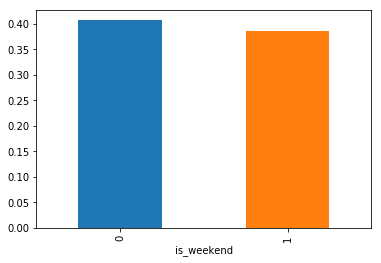

In [457]:
new_df.groupby('is_weekend').mean()['state'].plot('bar');

In [458]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 331462 entries, 0 to 378660
Data columns (total 43 columns):
ID                  331462 non-null int64
name                331462 non-null object
category            331462 non-null object
main_category       331462 non-null object
currency            331462 non-null object
deadline            331462 non-null datetime64[ns]
goal                331462 non-null float64
launched            331462 non-null datetime64[ns]
pledged             331462 non-null float64
state               331462 non-null int64
backers             331462 non-null int64
country             331462 non-null object
usd_pledged_real    331462 non-null float64
usd_goal_real       331462 non-null float64
season              331462 non-null category
norm_log            331462 non-null float64
time_launched       331462 non-null float64
Art                 331462 non-null uint8
Comics              331462 non-null uint8
Crafts              331462 non-null uint8
Dance      

In [459]:
new_df['is_weekend'] = pd.Categorical(new_df.is_weekend)

In [460]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 331462 entries, 0 to 378660
Data columns (total 43 columns):
ID                  331462 non-null int64
name                331462 non-null object
category            331462 non-null object
main_category       331462 non-null object
currency            331462 non-null object
deadline            331462 non-null datetime64[ns]
goal                331462 non-null float64
launched            331462 non-null datetime64[ns]
pledged             331462 non-null float64
state               331462 non-null int64
backers             331462 non-null int64
country             331462 non-null object
usd_pledged_real    331462 non-null float64
usd_goal_real       331462 non-null float64
season              331462 non-null category
norm_log            331462 non-null float64
time_launched       331462 non-null float64
Art                 331462 non-null uint8
Comics              331462 non-null uint8
Crafts              331462 non-null uint8
Dance      

In [461]:
#X_train, X_test, y_train, y_test = train_test_split(new_df[features],new_df[predict],test_size=0.20, random_state=101)

In [462]:
from sklearn.neural_network import MLPClassifier

In [463]:
classifer = MLPClassifier(hidden_layer_sizes=(150,100,50), max_iter=300
                          ,activation = 'relu',solver='adam',random_state=1)

In [464]:
X_train, X_test, y_train, y_test = train_test_split(new_df[features],new_df[predict],test_size=0.20, random_state=101)

In [465]:
classifer.fit(X_train.iloc[:,:].values,y_train.values.ravel())

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(150, 100, 50), learning_rate='constant',
       learning_rate_init=0.001, max_iter=300, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [466]:
y_pred = classifer.predict(X_test)

In [467]:
cm = confusion_matrix(y_pred=y_pred,y_true=y_test)

In [468]:
print(classification_report(y_pred=y_pred,y_true=y_test))


             precision    recall  f1-score   support

          0       0.67      0.81      0.74     39517
          1       0.60      0.42      0.50     26776

avg / total       0.65      0.65      0.64     66293



In [469]:
accuracy_score(y_pred=y_pred,y_true=y_test)

0.6548655212465871

## here with NN we have gained +6% more accuracy 

## The Baseline

In [470]:
1-y_test.mean()

state    0.596096
dtype: float64